In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential


In [2]:
dataset_train = pd.read_csv('/content/trainset.csv')
print(dataset_train.columns)
print(dataset_train.head())
train_set = dataset_train.iloc[:, 1:2].values
print(type(train_set))
print(train_set.shape)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date        Open        High         Low       Close   Adj Close  \
0  2013-01-02  357.385559  361.151062  355.959839  359.288177  359.288177   
1  2013-01-03  360.122742  363.600128  358.031342  359.496826  359.496826   
2  2013-01-04  362.313507  368.339294  361.488861  366.600616  366.600616   
3  2013-01-07  365.348755  367.301056  362.929504  365.001007  365.001007   
4  2013-01-08  365.393463  365.771027  359.874359  364.280701  364.280701   

    Volume  
0  5115500  
1  4666500  
2  5562800  
3  3332900  
4  3373900  
<class 'numpy.ndarray'>
(1259, 1)


In [3]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(train_set)
print(training_set_scaled.shape)

# Creating the X_train and y_train datasets
X_train_array = []
y_train_array = []
for i in range(60, 1259):
    X_train_array.append(training_set_scaled[i-60:i, 0])
    y_train_array.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)


(1259, 1)
(1199, 60)


In [4]:
length = 60
n_features = 1
model = Sequential()
model.add(layers.SimpleRNN(50, input_shape=(length, n_features)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
print("Name: Bhargava S      Register Number: 212221040029")
model.summary()


Name: Bhargava S      Register Number: 212221040029


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.fit(X_train1, y_train, epochs=100, batch_size=32)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0429
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6608e-04 
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.6265e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1796e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3408e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7328e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4197e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2288e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1488e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9927e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2761e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1402e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9321e-04
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0068e-04
Epoch 15/100
3

In [6]:
dataset_test = pd.read_csv('/content/testset.csv')
test_set = dataset_test.iloc[:, 1:2].values
print(test_set.shape)

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total.values
inputs = inputs.reshape(-1, 1)
inputs_scaled = sc.transform(inputs)

# Creating X_test dataset
X_test = []
for i in range(60, 1384):
    X_test.append(inputs_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(125, 1)
(1324, 60, 1)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Name: Bhargava S         Register Number: 212221040029


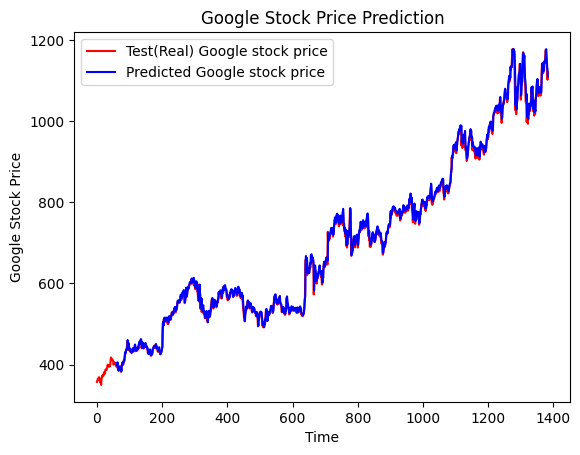

In [7]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

# Plotting the results
print("Name: Bhargava S         Register Number: 212221040029")
plt.plot(np.arange(0, 1384), inputs, color='red', label='Test(Real) Google stock price')
plt.plot(np.arange(60, 1384), predicted_stock_price, color='blue', label='Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
